# Analisis de texto

In [6]:
!python -m spacy download es_core_news_md
!pip install spacy matplotlib wordcloud


     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
      --------------------------------------- 0.8/42.3 MB 4.8 MB/s eta 0:00:09
     - -------------------------------------- 1.8/42.3 MB 4.9 MB/s eta 0:00:09
     -- ------------------------------------- 2.9/42.3 MB 5.0 MB/s eta 0:00:08
     --- ------------------------------------ 3.4/42.3 MB 4.1 MB/s eta 0:00:10
     ---- ----------------------------------- 4.5/42.3 MB 4.3 MB/s eta 0:00:09
     ----- ---------------------------------- 5.5/42.3 MB 4.4 MB/s eta 0:00:09
     ----- ---------------------------------- 6.3/42.3 MB 4.3 MB/s eta 0:00:09
     ------ --------------------------------- 7.3/42.3 MB 4.4 MB/s eta 0:00:08
     ------- -------------------------------- 8.1/42.3 MB 4.3 MB/s eta 0:00:09
     -------- ------------------------------- 9.2/42.3 MB 4.3 MB/s eta 0:00:08
     --------- ------------------------------ 10.2/42.3 MB 4.4 MB/s eta 0:00:08
     ---------- ----------------------------- 11.3/42.3 MB


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import spacy
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nlp = spacy.load("es_core_news_md")
print("spaCy y el modelo de español están listos ✅")


spaCy y el modelo de español están listos ✅


In [5]:
!pip install -U spacy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
with open("C:/Users/Paula/OneDrive/Documentos/7 SEMESTRE/CIENCIA DE DATOS I/Conducta en los velorios.txt", "r", encoding="utf-8") as f:
    text1 = f.read()

with open("C:/Users/Paula/OneDrive/Documentos/7 SEMESTRE/CIENCIA DE DATOS I/La casa de Asterión.txt", "r", encoding="utf-8") as f:
    text2 = f.read()
    

In [10]:
def limpiar_texto(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # quitar URLs
    text = re.sub(r'\d+', '', text)  # quitar números
    text = text.translate(str.maketrans('', '', string.punctuation))  # quitar puntuación
    text = re.sub(r'\s+', ' ', text).strip()  # quitar espacios extra
    return text

text1_clean = limpiar_texto(text1)
text2_clean = limpiar_texto(text2)

In [11]:
def resumen_texto(text):
    doc = nlp(text)
    parrafos = text.count("\n\n") + 1
    oraciones = len(list(doc.sents))
    palabras = len([token for token in doc if token.is_alpha])
    return parrafos, oraciones, palabras

p1, s1, w1 = resumen_texto(text1_clean)
p2, s2, w2 = resumen_texto(text2_clean)

print("📘 TEXTO 1")
print(f"Párrafos: {p1}, Oraciones: {s1}, Palabras: {w1}")
print("\n📙 TEXTO 2")
print(f"Párrafos: {p2}, Oraciones: {s2}, Palabras: {w2}")

📘 TEXTO 1
Párrafos: 1, Oraciones: 1, Palabras: 1474

📙 TEXTO 2
Párrafos: 1, Oraciones: 1, Palabras: 883


In [12]:
def obtener_lemmas(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

lemmas1 = obtener_lemmas(text1_clean)
lemmas2 = obtener_lemmas(text2_clean)

In [14]:
freq1 = Counter(lemmas1).most_common(15)
freq2 = Counter(lemmas2).most_common(15)

print("\n🔹 Palabras más frecuentes en Texto 1:")
print(freq1)
print("\n🔹 Palabras más frecuentes en Texto 2:")
print(freq2)


🔹 Palabras más frecuentes en Texto 1:
[('pariente', 12), ('vecino', 10), ('llorar', 9), ('prima', 8), ('deudo', 7), ('velorio', 6), ('casa', 5), ('difunto', 5), ('ataúd', 5), ('hermano', 5), ('quedar', 4), ('familia', 4), ('patio', 4), ('cosa', 4), ('hora', 4)]

🔹 Palabras más frecuentes en Texto 2:
[('casa', 10), ('asterión', 6), ('hombre', 6), ('galería', 5), ('infinito', 4), ('noche', 4), ('sol', 4), ('piedra', 4), ('catorce', 4), ('mundo', 4), ('puerta', 3), ('cara', 3), ('templo', 3), ('mar', 3), ('aljibe', 3)]


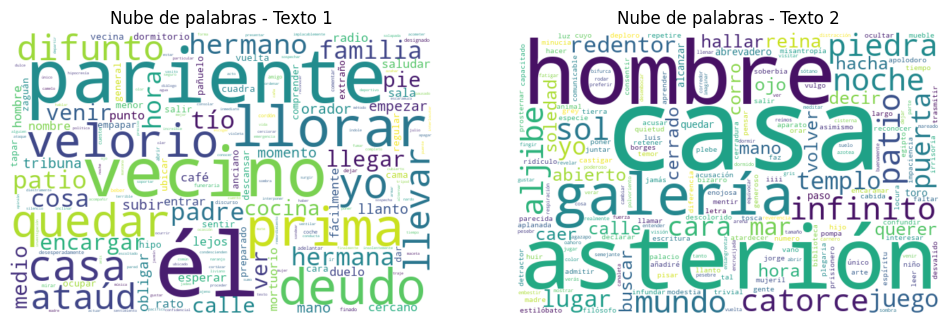

In [15]:
wc1 = WordCloud(width=600, height=400, background_color="white").generate(" ".join(lemmas1))
wc2 = WordCloud(width=600, height=400, background_color="white").generate(" ".join(lemmas2))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Texto 1")

plt.subplot(1,2,2)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras - Texto 2")

plt.show()


In [16]:
def palabras_por_etiqueta(text, etiqueta):
    doc = nlp(text)
    palabras = [token.text.lower() for token in doc if token.pos_ == etiqueta]
    return Counter(palabras).most_common(10)

sust1 = palabras_por_etiqueta(text1_clean, "NOUN")
verb1 = palabras_por_etiqueta(text1_clean, "VERB")
adj1 = palabras_por_etiqueta(text1_clean, "ADJ")

sust2 = palabras_por_etiqueta(text2_clean, "NOUN")
verb2 = palabras_por_etiqueta(text2_clean, "VERB")
adj2 = palabras_por_etiqueta(text2_clean, "ADJ")

print("\n📗 Texto 1 - Sustantivos más comunes:", sust1)
print("📗 Texto 1 - Verbos más comunes:", verb1)
print("📗 Texto 1 - Adjetivos más comunes:", adj1)
print("\n📕 Texto 2 - Sustantivos más comunes:", sust2)
print("📕 Texto 2 - Verbos más comunes:", verb2)
print("📕 Texto 2 - Adjetivos más comunes:", adj2)


📗 Texto 1 - Sustantivos más comunes: [('parientes', 11), ('vecinos', 9), ('deudos', 7), ('velorio', 5), ('difunto', 5), ('ataúd', 5), ('primas', 5), ('casa', 4), ('familia', 4), ('patio', 4)]
📗 Texto 1 - Verbos más comunes: [('llorar', 5), ('encarga', 3), ('lloran', 3), ('da', 3), ('vamos', 2), ('condescienden', 2), ('quedan', 2), ('ven', 2), ('entrar', 2), ('venido', 2)]
📗 Texto 1 - Adjetivos más comunes: [('mayor', 5), ('segunda', 2), ('mortuoria', 2), ('menor', 2), ('general', 2), ('junto', 2), ('designado', 2), ('completo', 1), ('solapadas', 1), ('único', 1)]

📕 Texto 2 - Sustantivos más comunes: [('casa', 10), ('veces', 7), ('asterión', 5), ('vez', 5), ('sol', 4), ('galerías', 4), ('mundo', 4), ('tal', 3), ('noche', 3), ('hombres', 3)]
📕 Texto 2 - Verbos más comunes: [('sé', 3), ('quiera', 2), ('hallará', 2), ('corro', 2), ('dio', 1), ('llamó', 1), ('acusan', 1), ('castigaré', 1), ('salgo', 1), ('mienten', 1)]
📕 Texto 2 - Adjetivos más comunes: [('infinitos', 3), ('apolodoro', 1)

In [17]:
def extraer_svo(text):
    doc = nlp(text)
    tripletas = []
    for sent in doc.sents:
        sujeto = ""
        verbo = ""
        objeto = ""
        for token in sent:
            if "subj" in token.dep_:
                sujeto = token.text
            if token.pos_ == "VERB":
                verbo = token.text
            if "obj" in token.dep_:
                objeto = token.text
        if sujeto and verbo and objeto:
            tripletas.append((sujeto, verbo, objeto))
    return tripletas[:10]

print("\n🧩 Ejemplos de tripletas SVO - Texto 1:")
print(extraer_svo(text1_clean))
print("\n🧩 Ejemplos de tripletas SVO - Texto 2:")
print(extraer_svo(text2_clean))


🧩 Ejemplos de tripletas SVO - Texto 1:
[('parientes', 'lleven', 'los')]

🧩 Ejemplos de tripletas SVO - Texto 2:
[('adjetivo', 'vale', 'motivos')]
